<a href="https://colab.research.google.com/github/jacob-desselles/DS-Unit-2-Kaggle-Challenge/blob/master/DS-Unit-2-Kaggle-Challenge/Jacob_Desselles_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 256kB 3.4MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 3.1MB 11.4MB/s 
     |████████████████████████████████| 614kB 32.2MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 296kB 36.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=09409351b20cd17a484e9b3e81b136c7582fab47adcfb51f6173d86fc6cac4a7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=663868aa33c52104c79d253e445e6118bc16ef59fbe52a28d5f698daa54eaf8d
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha25

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [0]:
from sklearn.model_selection import train_test_split
train,val=train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

In [0]:
target='status_group'
train_features=train.drop(columns=[target,'id'])
number_features=train_features.select_dtypes(include='number').columns.tolist()
nono_features=train_features.select_dtypes(exclude='number').nunique()
categorical_features=nono_features[nono_features<=50].index.tolist()
features=number_features + categorical_features

In [0]:
X_train=train[features]
y_train=train[target]
X_val=val[features]
y_val=val[target]
X_test=test[features]

In [10]:
X_train

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,0.0,0,33.542898,-9.174777,0,12,4,0,0,Lake Nyasa,Mbeya,True,GeoData Consultants Ltd,VWC,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7263,500.0,2049,34.665760,-9.308548,0,11,4,175,2008,Rufiji,Iringa,True,GeoData Consultants Ltd,WUA,True,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2486,25.0,290,38.238568,-6.179919,0,6,1,2300,2010,Wami / Ruvu,Pwani,True,GeoData Consultants Ltd,VWC,False,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
313,0.0,0,30.716727,-1.289055,0,18,1,0,0,Lake Victoria,Kagera,True,GeoData Consultants Ltd,NaN,True,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
52726,0.0,0,35.389331,-6.399942,0,1,6,0,0,Internal,Dodoma,True,GeoData Consultants Ltd,VWC,True,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,50.0,489,38.268574,-5.450254,4,4,6,1300,2009,Pangani,Tanga,True,GeoData Consultants Ltd,VWC,False,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
58170,0.0,0,33.926294,-9.641293,0,12,3,0,0,Lake Nyasa,Mbeya,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
17191,0.0,599,39.262924,-10.768079,0,90,33,1,2012,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,False,submersible,submersible,submersible,vwc,user-group,other,other,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8192,30.0,426,39.348550,-10.642069,0,90,33,320,1988,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,False,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [11]:
X_val

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3290,0.0,0,31.509864,-1.153080,0,18,7,0,0,Lake Victoria,Kagera,True,GeoData Consultants Ltd,VWC,True,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
47666,2000.0,1576,29.838600,-4.429692,0,16,2,1,1991,Lake Tanganyika,Kigoma,True,GeoData Consultants Ltd,Water authority,False,other,other,other,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring
2538,25.0,898,37.748364,-4.061791,0,3,3,420,2011,Pangani,Kilimanjaro,True,GeoData Consultants Ltd,Water authority,NaN,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
53117,0.0,0,33.380346,-3.132556,0,19,4,0,0,Lake Victoria,Mwanza,NaN,GeoData Consultants Ltd,VWC,True,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
51817,0.0,548,37.648831,-6.725480,0,5,5,500,1985,Wami / Ruvu,Morogoro,True,GeoData Consultants Ltd,VWC,True,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,0.0,0,32.909535,-2.703095,0,19,7,0,0,Lake Victoria,Mwanza,NaN,GeoData Consultants Ltd,VWC,True,ksb,submersible,submersible,vwc,user-group,never pay,never pay,unknown,unknown,unknown,unknown,lake,river/lake,surface,communal standpipe multiple,communal standpipe
20942,0.0,844,37.418415,-3.357605,0,3,4,1,1974,Pangani,Kilimanjaro,False,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,other,other
29031,0.0,0,34.219732,-3.695008,0,17,6,0,0,Internal,Shinyanga,True,GeoData Consultants Ltd,WUA,True,windmill,wind-powered,wind-powered,wua,user-group,pay annually,annually,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,communal standpipe multiple,communal standpipe
3493,200.0,1784,38.253216,-4.577348,0,4,1,1,1978,Pangani,Tanga,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [12]:
train.shape,val.shape,test.shape

((47520, 41), (11880, 41), (14358, 40))

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce
da_pipe=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=31)
)
da_pipe.fit(X_train,y_train)
print('Train Accuracy:',da_pipe.score(X_train,y_train))
print('Validation Accuracy:',da_pipe.score(X_val,y_val))
y_pred=da_pipe.predict(X_test)

Train Accuracy: 0.9954755892255892
Validation Accuracy: 0.7591750841750842


In [32]:
da_real_pipe=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(min_samples_leaf=21,random_state=31)
)
da_real_pipe.fit(X_train,y_train)
print('Train Accuracy:',da_real_pipe.score(X_train,y_train))
print('Validation Accuracy:',da_real_pipe.score(X_val,y_val))

Train Accuracy: 0.8049873737373737
Validation Accuracy: 0.7706228956228957


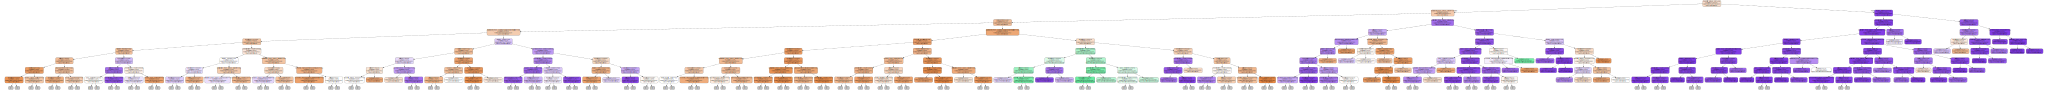

In [36]:
import graphviz
from sklearn.tree import export_graphviz
model=da_real_pipe.named_steps['decisiontreeclassifier']
encoder=da_real_pipe.named_steps['onehotencoder']
encoded_columns=encoder.transform(X_val).columns
treetime=export_graphviz(model, 
                           out_file=None, 
                           max_depth=8, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(treetime))

In [0]:
y_pred = da_real_pipe.predict(X_test)

In [0]:
submission=test[['id']].copy()
submission['status_group']=y_pred

In [63]:
submission

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [0]:
submission.to_csv('jacob-desselles-water-pump.csv', index=False)


In [65]:
X_train

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,0.0,0,33.542898,-9.174777,0,12,4,0,0,Lake Nyasa,Mbeya,True,GeoData Consultants Ltd,VWC,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7263,500.0,2049,34.665760,-9.308548,0,11,4,175,2008,Rufiji,Iringa,True,GeoData Consultants Ltd,WUA,True,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2486,25.0,290,38.238568,-6.179919,0,6,1,2300,2010,Wami / Ruvu,Pwani,True,GeoData Consultants Ltd,VWC,False,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
313,0.0,0,30.716727,-1.289055,0,18,1,0,0,Lake Victoria,Kagera,True,GeoData Consultants Ltd,NaN,True,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
52726,0.0,0,35.389331,-6.399942,0,1,6,0,0,Internal,Dodoma,True,GeoData Consultants Ltd,VWC,True,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,50.0,489,38.268574,-5.450254,4,4,6,1300,2009,Pangani,Tanga,True,GeoData Consultants Ltd,VWC,False,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
58170,0.0,0,33.926294,-9.641293,0,12,3,0,0,Lake Nyasa,Mbeya,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
17191,0.0,599,39.262924,-10.768079,0,90,33,1,2012,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,False,submersible,submersible,submersible,vwc,user-group,other,other,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8192,30.0,426,39.348550,-10.642069,0,90,33,320,1988,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,False,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
